ref : https://twinsynergy.co.th/70-machine-learning-datasets-project-ideas/

dataset : https://archive.ics.uci.edu/ml/datasets/wine+quality

6. Wine quality dataset

เป็นชุดข้อมูลที่ภายในประกอบไปด้วยข้อมูลทางเคมีที่แตกต่างกันเกี่ยวกับไวน์ มีทั้งหมด 4898 ขวด แต่ละขวดมี 14 ตัวแปร ชุดข้อมูลนี้เหมาะสำหรับการทำ classification และ regression เพื่อใช้ทำนายคุณภาพไวน์ได้

Data Science Project Idea: ใช้ Machine Learning algorithm แบบต่าง ๆ เช่น regression, decision tree, random forests เพื่อแยกความแตกต่างของไวน์ และวิเคราะห์คุณภาพไวน์ได้

## Import Libraries


In [36]:
# fundamental libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for label encoder
from sklearn.preprocessing import LabelEncoder
# for split data
from sklearn.model_selection import train_test_split
# for tree
from sklearn import tree
# for check performance
from sklearn.metrics import accuracy_score

In [37]:
df = pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Preprocessing

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


don't have missing values!

In [39]:
# drop indepenent feature
input = df.drop(['quality'],axis='columns')
y = df['quality'] 

In [40]:
# convert value to length
input['fixed acidity'] = pd.qcut(input['fixed acidity'],3,labels=["low","Medium","High"])
input['volatile acidity'] = pd.qcut(input['volatile acidity'],3,labels=["low","Medium","High"])
input['citric acid'] = pd.qcut(input['citric acid'],3,labels=["low","Medium","High"])
input['residual sugar'] = pd.qcut(input['residual sugar'],3,labels=["low","Medium","High"])
input['chlorides'] = pd.qcut(input['chlorides'],3,labels=["low","Medium","High"])
input['free sulfur dioxide'] = pd.qcut(input['free sulfur dioxide'],3,labels=["low","Medium","High"])
input['total sulfur dioxide'] = pd.qcut(input['total sulfur dioxide'],3,labels=["low","Medium","High"])
input['density'] = pd.qcut(input['density'],3,labels=["low","Medium","High"])
input['pH'] = pd.qcut(input['pH'],3,labels=["low","Medium","High"])
input['sulphates'] = pd.qcut(input['sulphates'],3,labels=["low","Medium","High"])
input['alcohol'] = pd.qcut(input['alcohol'],3,labels=["low","Medium","High"])

In [41]:
# label encoder
le_age = LabelEncoder()
input['fixed acidity'] = le_age.fit_transform(input['fixed acidity'])
input['volatile acidity'] = le_age.fit_transform(input['volatile acidity'])
input['citric acid'] = le_age.fit_transform(input['citric acid'])
input['residual sugar'] = le_age.fit_transform(input['residual sugar'])
input['chlorides'] = le_age.fit_transform(input['chlorides'])
input['free sulfur dioxide'] = le_age.fit_transform(input['free sulfur dioxide'])
input['total sulfur dioxide'] = le_age.fit_transform(input['total sulfur dioxide'])
input['density'] = le_age.fit_transform(input['density'])
input['pH'] = le_age.fit_transform(input['pH'])
input['sulphates'] = le_age.fit_transform(input['sulphates'])
input['alcohol'] = le_age.fit_transform(input['alcohol'])
input

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2,0,2,2,1,1,1,0,0,2,2
1,1,0,2,0,0,0,0,1,2,1,1
2,1,0,2,1,0,1,0,1,1,1,1
3,0,2,0,2,1,1,0,0,2,1,1
4,2,0,2,2,1,1,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1594,2,1,2,2,0,0,1,2,0,1,1
1595,2,1,2,1,2,0,1,2,0,0,0
1596,2,1,2,1,1,0,1,2,0,0,0
1597,2,0,2,2,1,0,1,2,0,0,1


In [42]:
X_train, X_test, y_train, y_test = train_test_split(input, y, test_size = 0.3, random_state = 0)

## Model

In [43]:
classifier = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(418.5, 475.65000000000003, 'X[10] <= 0.5\ngini = 0.651\nsamples = 1119\nvalue = [7, 38, 473, 434, 154, 13]'),
 Text(209.25, 339.75, 'X[1] <= 1.5\ngini = 0.673\nsamples = 359\nvalue = [2, 15, 59, 164, 107, 12]'),
 Text(104.625, 203.85000000000002, 'X[9] <= 1.5\ngini = 0.66\nsamples = 186\nvalue = [2, 14, 46, 93, 28, 3]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.608\nsamples = 132\nvalue = [0, 6, 22, 75, 26, 3]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.667\nsamples = 54\nvalue = [2, 8, 24, 18, 2, 0]'),
 Text(313.875, 203.85000000000002, 'X[9] <= 0.5\ngini = 0.615\nsamples = 173\nvalue = [0, 1, 13, 71, 79, 9]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.579\nsamples = 97\nvalue = [0, 0, 5, 33, 53, 6]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.62\nsamples = 76\nvalue = [0, 1, 8, 38, 26, 3]'),
 Text(627.75, 339.75, 'X[9] <= 1.5\ngini = 0.572\nsamples = 760\nvalue = [5, 23, 414, 270, 47, 1]'),
 Text(523.125, 203.85000000000002, 'X[6] <= 0.5\ngini = 0.6\nsamples = 469\

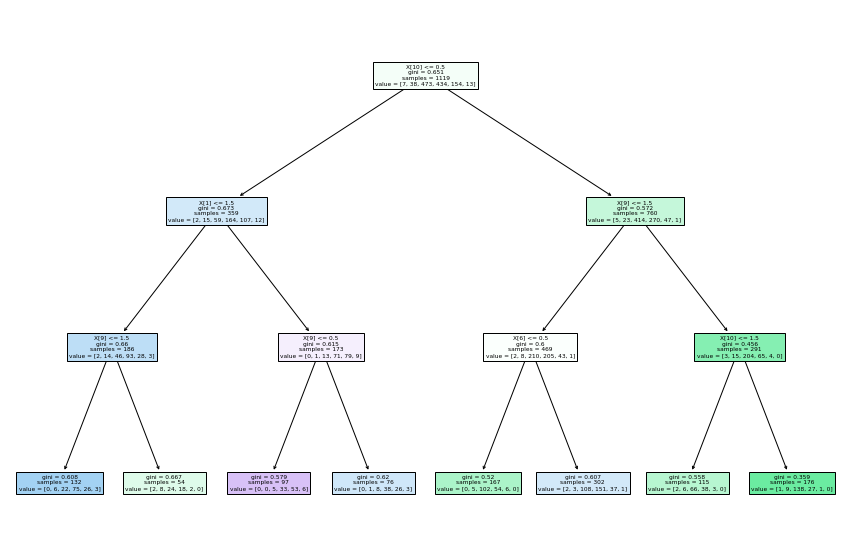

In [44]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [45]:
print(tree.export_text(classifier))

|--- feature_10 <= 0.50
|   |--- feature_1 <= 1.50
|   |   |--- feature_9 <= 1.50
|   |   |   |--- class: 6
|   |   |--- feature_9 >  1.50
|   |   |   |--- class: 5
|   |--- feature_1 >  1.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 7
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 6
|--- feature_10 >  0.50
|   |--- feature_9 <= 1.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 5
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 6
|   |--- feature_9 >  1.50
|   |   |--- feature_10 <= 1.50
|   |   |   |--- class: 5
|   |   |--- feature_10 >  1.50
|   |   |   |--- class: 5

